# Xedocs user guide

This tutorial serves as a basic introduction to xedocs. Xedocs is the replacement of CMT (Correction Management System) and will be used moving forward to store, save and access correction data as well as other metadata needed for the XENONnT experiment moving forward. The main goal with xedocs was to have a system with the following requierments: We want versioned data that is flexible enough to adapt to future changes, to have insertion rules and to follow time dependace requirements.


The purpose of this document it to show the reader how to use some of the functions in xedocs, these will include:
- getting corrections by run_id or date from the analyst database and your own database.
- Inserting corrections data into the analyst database and your own database
- Reprocessing data using URLConfigurations
- How to make your own schema (or correction).
- Next we will load the PMT gains showing how to get multivalue corrections

In [1]:
import strax
import straxen
import xedocs as xd
import numpy as np
import rframe
import pymongo
import matplotlib.pyplot as plt

Could not import editors, GUI not available.


In [2]:
straxen.print_versions('strax straxen rframe xedocs'.split())

,module,version,path,git
0,python,3.8.13,/opt/conda/envs/strax/bin/python,None
1,strax,1.4.0,/home/luissanchez25/.local/lib/python3.8/site-...,branch:relative_light_yield_schema | 3cd255b
2,straxen,2.0.3,/home/luissanchez25/.local/lib/python3.8/site-...,branch:relative_light_yield_schema | 3cd255b
3,rframe,0.2.1,/home/luissanchez25/.local/lib/python3.8/site-...,branch:relative_light_yield_schema | 3cd255b
4,xedocs,0.2.8,/home/luissanchez25/.local/lib/python3.8/site-...,branch:relative_light_yield_schema | 3cd255b


In [3]:
# Change this to your own folder if you are trying to run this tutorial notebook
url = ''

With xedocs we can use schemas to get different corrections from multiple sources such as bodega (refered to as 'detector numbers'), the xedocs databse, or even your own! Schemas are python classes with certain properties and functions to deal with the backend of storing data as well as rules such as preventing the deletion and overwritting of existing data!
<br>
Lets look at some of the schemas that are available!

In [3]:
xd.list_schemas()

['detector_numbers',
 'context_configs',
 'plugin_lineages',
 'context_lineages',
 'fax_configs',
 'electron_drift_velocities',
 'electron_drift_time_gates',
 'electron_lifetimes',
 'rel_extraction_effs',
 'fdc_maps',
 'hit_thresholds',
 'pmt_gains',
 'posrec_models',
 's1_aft_xyz_maps',
 's1_xyz_maps',
 's2_xy_maps',
 'se_gains',
 'electron_diffusion_cte',
 'baseline_samples_nv',
 'relative_light_yield',
 'avg_se_gains',
 'bayes_models',
 'utube_calibrations',
 'diffused_calibrations',
 'ibelt_calibrations',
 'calibration_sources',
 'hotspot_reports',
 'anode_ramps',
 'anode_washes',
 'abnormal_daq_rates',
 'processing_requests',
 'pmt_gain_calculations',
 'pmt_voltage_changes',
 'pmt_installs',
 'pmt_voltage_settings']

#### As you can see we can store all kinds of metadata here not just corrections!

### Accessing data

Here we will see how to access data from the straxen database, later on we will show how you can access data from any database!

In [6]:
xd_db = xd.development_db.utilix # here we can spesify the context or database we will be using

In [4]:
xd_db = xd.straxen_db.utilix

The data can be returned to the user in a varaiety of formats, for example in a pandas dataframe structure:

In [9]:
xd_db.electron_lifetimes.find_df(version='ONLINE')

created_date comments reviews  \
version time                                                           
ONLINE  2017-01-01 00:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 00:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 06:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 12:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 18:00:00 2022-12-22 15:14:06.975               []   
...                                             ...      ...     ...   
        2022-09-30 03:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 09:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 15:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 21:06:03 2022-12-22 15:14:06.971               []   
        2022-10-01 03:06:03 2022-12-22 15:14:06.971               []   

                                    value  
version time                               
ONLINE  2017-01-01 00:00:00  2.000000e+05  
        2020-10-14 00:00:00  7.125580e+04  
        2020-10-14 06:00:00  6.927400e+04  
        2020-10-14 12:00:00  6.903980e+04  
        2020-10-14 18:00:00  6.819510e+04  
...                                   ...  
        2022-09-30 03:06:03  8.180421e+06  
        2022-09-30 09:06:03  8.180421e+06  
        2022-09-30 15:06:03  8.180421e+06  
        2022-09-30 21:06:03  8.180421e+06  
        2022-10-01 03:06:03  8.180421e+06  

[2660 rows x 4 columns]

In [10]:
elife = xd_db.electron_lifetimes.find_df(version='ONLINE') # if you try to 

In [11]:
elife

created_date comments reviews  \
version time                                                           
ONLINE  2017-01-01 00:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 00:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 06:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 12:00:00 2022-12-22 15:14:06.975               []   
        2020-10-14 18:00:00 2022-12-22 15:14:06.975               []   
...                                             ...      ...     ...   
        2022-09-30 03:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 09:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 15:06:03 2022-12-22 15:14:06.971               []   
        2022-09-30 21:06:03 2022-12-22 15:14:06.971               []   
        2022-10-01 03:06:03 2022-12-22 15:14:06.971               []   

                                    value  
version time                               
ONLINE  2017-01-01 00:00:00  2.000000e+05  
        2020-10-14 00:00:00  7.125580e+04  
        2020-10-14 06:00:00  6.927400e+04  
        2020-10-14 12:00:00  6.903980e+04  
        2020-10-14 18:00:00  6.819510e+04  
...                                   ...  
        2022-09-30 03:06:03  8.180421e+06  
        2022-09-30 09:06:03  8.180421e+06  
        2022-09-30 15:06:03  8.180421e+06  
        2022-09-30 21:06:03  8.180421e+06  
        2022-10-01 03:06:03  8.180421e+06  

[2660 rows x 4 columns]

#### In a dictionary format

In [12]:
elife = xd_db.electron_lifetimes.find_dicts(version='ONLINE') # if you try to 

In [13]:
elife[:3]

[{'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2017, 1, 1, 0, 0),
  'value': 200000.0},
 {'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2020, 10, 14, 0, 0),
  'value': 71255.79834},
 {'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2020, 10, 14, 6, 0),
  'value': 69274.00208}]

#### In the "DOCS" or document format

In [14]:
elife = xd_db.electron_lifetimes.find_docs(version='ONLINE') # if you try to 

In [15]:
elife[:3]

[
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=ONLINE, time=2017-01-01 00:00:00
         Values:        created_date=2022-12-22 15:14:06.975000, comments=, reviews=[], value=200000.0
         ,
 
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=ONLINE, time=2020-10-14 00:00:00
         Values:        created_date=2022-12-22 15:14:06.975000, comments=, reviews=[], value=71255.79834
         ,
 
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=ONLINE, time=2020-10-14 06:00:00
         Values:        created_date=2022-12-22 15:14:06.975000, comments=, 

#### In a list format

In [16]:
elife = xd_db.electron_lifetimes.find(version='ONLINE') # if you try to 

In [17]:
list(elife)[:3]

[{'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2017, 1, 1, 0, 0),
  'value': 200000.0},
 {'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2020, 10, 14, 0, 0),
  'value': 71255.79834},
 {'version': 'ONLINE',
  'created_date': datetime.datetime(2022, 12, 22, 15, 14, 6, 975000),
  'comments': '',
  'reviews': [],
  'time': datetime.datetime(2020, 10, 14, 6, 0),
  'value': 69274.00208}]

#### Or you can just get one data point if that is all you want!

In [41]:
elife = xd_db.electron_lifetimes.find_one(version='ONLINE') # if you try to 

In [42]:
elife


        Xenon ElectronLifetime Document
        -------------------------------
 
        Category:      corrections
        Alias:         electron_lifetimes
        Index:         version=ONLINE, time=2017-01-01 00:00:00
        Values:        created_date=2022-12-22 15:14:06.975000, comments=, reviews=[], value=200000.0
        

##### You can pass many different arguments into the search parameters to make your scope as limited or as wide as you might want it, you can also use _sort options if you want the data to be returned in a particualr order.

In [18]:
rel_ext_eff = xd_db.rel_extraction_effs.find_docs(version='v3')

In [19]:
rel_ext_eff[:3]

[
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2017-01-01 00:00:00, partition=ab
         Values:        created_date=2022-08-05 15:07:51.600000, comments=, reviews=[], value=1.0
         ,
 
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2017-01-01 00:00:00, partition=cd
         Values:        created_date=2022-08-05 15:07:51.600000, comments=, reviews=[], value=1.0
         ,
 
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2021-05-03 11:13:17.786000, partition=ab
         Values:        created_date=2022-08-05 1

In [20]:
rel_ext_eff = xd_db.rel_extraction_effs.find_docs(version='v3', _sort = 'time')

In [21]:
rel_ext_eff[-2:] # here we sorted by time and saw the end of the correction in time

[
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2022-05-06 21:45:38.508000, partition=ab
         Values:        created_date=2022-08-05 15:07:51.348000, comments=, reviews=[], value=1.0
         ,
 
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2022-05-06 21:45:38.508000, partition=cd
         Values:        created_date=2022-08-05 15:07:51.348000, comments=, reviews=[], value=1.0
         ]

In [22]:
rel_ext_eff = xd_db.rel_extraction_effs.find_docs(version='v3', 
                                                  run_id = '027434', 
                                                  partition = 'ab')

In [23]:
rel_ext_eff

[
         Xenon RelExtractionEff Document
         -------------------------------
  
         Category:      corrections
         Alias:         rel_extraction_effs
         Index:         version=v3, time=2021-08-30 13:31:05.901000, partition=ab
         Values:        created_date=2022-08-05 15:07:51.377000, comments=, reviews=[], value=1.0
         ]

##### Data stored in xedocs have multiple indecies, and there is a requierment that all indecies are unique, therefore you can only save new data when it has indecies where the combination of all indecies is unique

It is important to note that the analyst_db is the default database, therefore if a context or database is not defined that analyst database will be used. This means that if we can also access the data above without having to spesify a context however it is good practice to always do so.

We can also access the Bodega data through schemas using 'DetectorNumber'

In [36]:
xd_db.detector_numbers.find_one(field='g1')


        Xenon DetectorNumber Document
        -----------------------------
 
        Category:      general
        Alias:         detector_numbers
        Index:         version=v0, field=g1, partition=all_tpc
        Values:        value=0.17, uncertainty=0.0062, definition=, reference=https://github.com/XENONnT/bbf/blob/master/bbf/config/template_config/pars/ERTemplateParameters_XENONnT.ini, date=2021-05-05 00:00:00, comments=Taken from bbf config
        

In [40]:
se_gain = xd_db.detector_numbers.find(field = 'se_gain')

In [43]:
list(se_gain)

[{'version': 'v0',
  'field': 'se_gain',
  'partition': 'all_tpc',
  'value': 32.3604,
  'uncertainty': 0.077,
  'definition': '',
  'reference': 'https://xe1t-wiki.lngs.infn.it/doku.php?id=jlong:sr0_ramp_up_kr_se_study',
  'date': datetime.datetime(2021, 11, 3, 0, 0),
  'comments': 'Fitted from SE population'},
 {'version': 'v1',
  'field': 'se_gain',
  'partition': 'ab',
  'value': 30.090992211040312,
  'uncertainty': 0.08738706743911372,
  'definition': '',
  'reference': 'https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonnt:analysis:sr0_se_conclusive_page',
  'date': datetime.datetime(2022, 5, 12, 0, 0),
  'comments': 'Poisson&Gaussian fitted from SE population for background_linked runs under sr0_preliminary condition between 2021-07-05 and 2021-08-08'},
 {'version': 'v1',
  'field': 'se_gain',
  'partition': 'all_tpc',
  'value': 31.151821493235058,
  'uncertainty': 0.9715038932217172,
  'definition': '',
  'reference': 'https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonn

### Saving data using xedocs

To save new data using xedocs we need to know what indecies that particular schema has. By defualt all schemas will require a version and a run_id or time for the indecies and a value to actually upload. However other shcemas can have additional indecies you need to spesify such as algorithm for machine learning related currections such as 'mlp', 'cnn' and 'gcn', format of the data, among others. As such we need to first know what are the indecies required and then we can upload the data!

For this set of correction we will save the data in our own mongodb, if you want to upload the data into the analyst_db you can either ommit the datasource or use 'analyst_db' as the datasource. For the straxen_db (the database were all the confirmed corrections will go), you use 'straxen_db' as the datasource

Here we will use our own mongodb

In [84]:
db = pymongo.MongoClient()['testCorrection']

In [48]:
xd.schemas.ElectronLifetime.find(version='v1', datasource=db['electron_lifetimes'])

[
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=v1, time=2022-09-13 11:14:46.741000
         Values:        created_date=2023-01-10 02:13:19.194000, comments=giving a 1% decrease to Electron lifetime, reviews=[], value=7362379.160154001
         ,
 
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=v1, time=2022-09-16 11:14:46.741000
         Values:        created_date=2023-01-10 02:13:19.194000, comments=giving a 10% decrease to Electron lifetime, reviews=[], value=7362379.160154001
         ,
 
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=v1, t

As one would expect our current database is empty so we cannot use any of the data so lets make a new value for the electron lifetime and try it out!

In [56]:
run_id = '047493'

In [99]:
# Get the ONLINE of elife for out run_id
elife_online = xd_db.electron_lifetimes.find_docs(version = 'ONLINE', run_id = run_id)

In [102]:
elife_new = xd.schemas.ElectronLifetime(value=elife_online[0].value*0.90, version='v1', 
                                        run_id=run_id,
                                        comments='giving a 10% decrease to Electron lifetime')

We simply reduced the value of the run_id by 10% now lets save the data!

In [103]:
elife_new.save(db['electron_lifetimes'])

Confirm we saved the file

In [117]:
xd.schemas.ElectronLifetime.find(version='v1', 
                                 run_id=run_id,
                                 datasource = db['electron_lifetimes'])

[
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=v1, time=2022-09-13 11:14:46.741000
         Values:        created_date=2023-01-10 02:13:19.194000, comments=giving a 1% decrease to Electron lifetime, reviews=[], value=7362379.160154001
         ]

We note the database is no longer empty which means we successfully saved the file to the database!

Now lets print out a histogram of the corrected areas using both values and lets see how that goes!

### Using URLConfigurations to reprocess data with straxen

All corrections in straxen have been changed to use URLConfigurations as these are more flexible and do not require us to have to change straxen every time we what to update the corrections. There are protocols in straxen and xedocs that take in a string URL and with this they are able to find and load the requested data.

In [51]:
# delete this line when runing this on Dali
url = './test_data/'

In [142]:
run_id

'047493'

In [52]:
st = straxen.contexts.xenonnt_online(output_folder = url, include_rucio_remote=True,download_heavy=True)

In [53]:
st_xd = straxen.contexts.xenonnt_online(output_folder = url, include_rucio_remote=True,download_heavy=True)

When using data in the analyst_db we can simply right the URLConfig in the following way:

In [54]:
st_xd.set_config({'elife':'xedocs://'
                  'electron_lifetimes'
                  '?version=ONLINE&run_id=047593&attr=value'})

In [57]:
st.get_single_plugin(run_id, 'corrected_areas').elife

8180421.28906

In [58]:
st_xd.get_single_plugin(run_id, 'corrected_areas').elife

8180421.28906

However when using your own database we have to take a few extra steps to register it such that xedocs can recognize it and use it for URLConfigurations

In [ ]:
xd.schemas.ElectronLifetime(value = 2424325564.448384,
                            version = 'v*',
                            run_id= '047593').save(db['electron_lifetimes'])

In [81]:
xd.schemas.ElectronLifetime.find(datasource = db['electron_lifetimes'],
                                version = 'v*',
                                run_id= '047593')

[
         Xenon ElectronLifetime Document
         -------------------------------
  
         Category:      corrections
         Alias:         electron_lifetimes
         Index:         version=v*, time=2022-09-22 09:28:08.382000
         Values:        created_date=2022-12-09 19:38:10.655000, comments=, reviews=[], value=2424325564.448384
         ]

In [65]:
xd.schemas.ElectronLifetime.register_datasource(db['electron_lifetimes'], name='test_db')

ValueError: Datasource name 'test_db' is already registered.

In [121]:
# You can also translate run_ids to times and vice versa whenever you need!
xd.settings.run_id_to_time(run_id)

datetime.datetime(2022, 9, 13, 11, 14, 46, 741000)

In [82]:
st_xd.set_config({'elife':'xedocs://'
                  'electron_lifetimes'
                  '?version=v*&db=test_db&run_id=047593&attr=value'})

In [83]:
st_xd.get_single_plugin(run_id, 'corrected_areas').elife

2424325564.448384

In [162]:
# Compare new data to old data to show it is different and the URLConfig did work

### Defining your own schemas!

Lets say you find something new about the detector, some conditions that need to be corrrected for but we currently do not have a plave to store this kind of data for use, what do we do? We make out own schema!

You do not have to start from scratch, there are many kinds of shcemas, from the bare bones base_schemas, to once with multiple inheritance like Base_Maps, you first need to indentify what kind of correction you want to make so you know what shcema you want to inherit from, for this you need to ask the following questions:
- Is the correction going to be one which we wnat to interpolate in time or do we want to use time intervals?
- What kind of data will you be storing? Map data? single numbers?
- Do you need to add any new indecies to your correction that no other has before?

In [5]:
# Lets make a new Schema
class NewCorrection(xd.schemas.corrections.TimeSampledCorrection):
    """
    TimeSampledCorrections allow us to interpolate data in time.
    This function will inherit all the properties of TimeSampledCorrections.
    Here you can define your own functions, new indecies or anything else you might need!
    
    One requierment that all newly defined correction classes must have is an ALIAS
    """
    
    # We give a class and alias by setting _ALIAS equal to the name
    # By convention we make alias all lower caps, with underscors (_) to separate words
    _ALIAS = 'new_corrections'
    
    # Lets say we want this correction to have a new index depth!
    # For this we do the following
    
    value: int
    
    depth: int = rframe.Index()
    
    # Setting the new variable = rframe.Index() lets xedocs know that this varaible
    # Should be treated as an index and will be requiered any new values of this correction 
    # Is made.
    
    # As mentions before we can even give it new functions as we see fit!
    def neg_data(value):
        return(-value)
        
    

Specially when inheriting form an exisiting class, creating new shcemas is super simple and easy! But now that you made this schema how are you able to use it with xedocs? We have to register it!

In [6]:
xd_db.new_corrections.find_docs(version = 'v1')

[]

### PMT gains

Now we will load data on PMT gains and show how we can do this with xedocs:
- We will first load a single pmt, both as an array and as a data frame
- Next we will load multiple PMTs 
- We will show how to navigate xedocs dataframes by index
- Finally we will load the PMT average gain

In [16]:
# the data is not filtered by any spesific field by default but you can sort it any way you want
pmt_0 = xd_db.corrections.pmt_gains.find_docs(version = 'v6', pmt = 0, detector = 'tpc', _sort='time')
# _sort='time' can be given to any find function to sort by a certain orfer
# _sort={'time':-1} can be given to sort data in decending order
pmt_0_val = [pmt.value for pmt in pmt_0] #store all the values in a pmt array

In [17]:
pmt_0[:5]

[
         Xenon PmtGain Document
         ----------------------
  
         Category:      corrections
         Alias:         pmt_gains
         Index:         version=v6, time=2020-04-01 12:06:54, detector=tpc, pmt=0
         Values:        created_date=2022-05-01 18:24:58.872000, comments=migrated from cmt., reviews=[], value=0.0550598626
         ,
 
         Xenon PmtGain Document
         ----------------------
  
         Category:      corrections
         Alias:         pmt_gains
         Index:         version=v6, time=2020-04-01 14:17:27, detector=tpc, pmt=0
         Values:        created_date=2022-05-01 18:24:58.872000, comments=migrated from cmt., reviews=[], value=0.0550598626
         ,
 
         Xenon PmtGain Document
         ----------------------
  
         Category:      corrections
         Alias:         pmt_gains
         Index:         version=v6, time=2020-04-01 14:17:28, detector=tpc, pmt=0
         Values:        created_date=2022-05-01 18:24:58.872000, 

In [58]:
pmt_0[0].value #you can extract the value of the correction

0.0550598626

In [47]:
xd.schemas.DetectorNumber.find_one(field='drift_velocity', version='v1')


        Xenon DetectorNumber Document
        -----------------------------
 
        Category:      general
        Alias:         detector_numbers
        Index:         version=v1, field=drift_velocity, partition=all_tpc
        Values:        value=0.0677, uncertainty=0.0006, definition=, reference=https://xe1t-wiki.lngs.infn.it/doku.php?id=dandrea:diffusionstudy_firstdatasr0_xenonnt, date=2021-05-06 00:00:00, comments=unvert is stat only
        

In [59]:
pmt_0[0].index_labels # prints out all indecies

{'version': 'v6',
 'time': datetime.datetime(2020, 4, 1, 12, 6, 54),
 'detector': 'tpc',
 'pmt': 0}

In [63]:
pmt_0[0].version # you can also output 

'v6'

In [67]:
pmt_0[0].pmt

0

In [60]:
pmt_0[0].index_labels['version'] # you can also ask for spesific index values

'v6'

In [61]:
pmt_0[0].column_values #prints out everything on the value field

{'created_date': datetime.datetime(2022, 5, 1, 18, 24, 58, 872000),
 'comments': 'migrated from cmt.',
 'reviews': [],
 'value': 0.0550598626}

In [19]:
pmt_0_df = xd_db.corrections.pmt_gains.find_df(version = 'v6', pmt = 0, detector = 'tpc', _sort='time')

In [20]:
pmt_0_df

value  \
version time                    detector pmt             
v6      2020-04-01 12:06:54.000 tpc      0    0.055060   
        2020-04-01 14:17:27.000 tpc      0    0.055060   
        2020-04-01 14:17:28.000 tpc      0    0.006624   
        2020-04-16 09:49:17.000 tpc      0    0.006624   
        2020-04-16 09:49:18.000 tpc      0    0.055060   
...                                                ...   
        2021-12-09 16:11:19.000 tpc      0    0.007945   
        2021-12-10 13:17:45.785 tpc      0    0.007945   
        2021-12-17 10:13:10.000 tpc      0    0.007947   
        2021-12-17 17:53:21.302 tpc      0    0.007947   
        2021-12-24 08:19:40.000 tpc      0    0.007951   

                                                        created_date  \
version time                    detector pmt                           
v6      2020-04-01 12:06:54.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-01 14:17:27.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-01 14:17:28.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-16 09:49:17.000 tpc      0   2022-05-01 18:24:58.872   
        2020-04-16 09:49:18.000 tpc      0   2022-05-01 18:24:58.872   
...                                                              ...   
        2021-12-09 16:11:19.000 tpc      0   2022-05-01 18:24:58.872   
        2021-12-10 13:17:45.785 tpc      0   2022-05-01 18:24:58.872   
        2021-12-17 10:13:10.000 tpc      0   2022-05-01 18:24:58.872   
        2021-12-17 17:53:21.302 tpc      0   2022-05-01 18:24:58.872   
        2021-12-24 08:19:40.000 tpc      0   2022-05-01 18:24:58.872   

                                                        comments  
version time                    detector pmt                      
v6      2020-04-01 12:06:54.000 tpc      0    migrated from cmt.  
        2020-04-01 14:17:27.000 tpc      0    migrated from cmt.  
        2020-04-01 14:17:28.000 tpc      0    migrated from cmt.  
        2020-04-16 09:49:17.000 tpc      0    migrated from cmt.  
        2020-04-16 09:49:18.000 tpc      0    migrated from cmt.  
...                                                          ...  
        2021-12-09 16:11:19.000 tpc      0    migrated from cmt.  
        2021-12-10 13:17:45.785 tpc      0    migrated from cmt.  
        2021-12-17 10:13:10.000 tpc      0    migrated from cmt.  
        2021-12-17 17:53:21.302 tpc      0    migrated from cmt.  
        2021-12-24 08:19:40.000 tpc      0    migrated from cmt.  

[302 rows x 3 columns]

To get multiple pmts all you have to do is change the pmt value to an array with the desired pmts

In [21]:
pmt_multi = xd_db.corrections.pmt_gains.find_docs(version = 'v6', pmt = [0, 5, 7], detector = 'tpc', sort = 'time')

In [22]:
pmt_multi_df = xd_db.corrections.pmt_gains.find_df(version = 'v6', pmt = [0, 5, 7], detector = 'tpc', sort = 'time')

In [23]:
pmt_multi_df

value  \
version time                    detector pmt             
v6      2020-04-01 12:06:54.000 tpc      0    0.055060   
                                         5    0.227363   
                                         7    0.058412   
        2020-04-01 14:17:27.000 tpc      0    0.055060   
                                         5    0.227363   
...                                                ...   
        2021-12-17 17:53:21.890 tpc      5    0.009499   
        2021-12-17 17:53:21.998 tpc      7    0.007816   
        2021-12-24 08:19:40.000 tpc      0    0.007951   
                                         5    0.009484   
                                         7    0.007820   

                                                        created_date  \
version time                    detector pmt                           
v6      2020-04-01 12:06:54.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
                                         7   2022-05-01 18:25:07.779   
        2020-04-01 14:17:27.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
...                                                              ...   
        2021-12-17 17:53:21.890 tpc      5   2022-05-01 18:25:05.278   
        2021-12-17 17:53:21.998 tpc      7   2022-05-01 18:25:07.779   
        2021-12-24 08:19:40.000 tpc      0   2022-05-01 18:24:58.872   
                                         5   2022-05-01 18:25:05.278   
                                         7   2022-05-01 18:25:07.779   

                                                        comments  
version time                    detector pmt                      
v6      2020-04-01 12:06:54.000 tpc      0    migrated from cmt.  
                                         5    migrated from cmt.  
                                         7    migrated from cmt.  
        2020-04-01 14:17:27.000 tpc      0    migrated from cmt.  
                                         5    migrated from cmt.  
...                                                          ...  
        2021-12-17 17:53:21.890 tpc      5    migrated from cmt.  
        2021-12-17 17:53:21.998 tpc      7    migrated from cmt.  
        2021-12-24 08:19:40.000 tpc      0    migrated from cmt.  
                                         5    migrated from cmt.  
                                         7    migrated from cmt.  

[897 rows x 3 columns]

If you are like me (a.k.a. not a coding expert at all) you might be confused as to how to access the different indecies in a dataframe that has so many, where a number of them are of a different size, the following code is how I figures out how to do it although there might be better methods out there

In [102]:
rframe.RemoteFrame(pmt_multi_df, xd.staging_db())

AttributeError: 'DataFrame' object has no attribute 'get_column_fields'

In [99]:
df = pmt_multi_df.rframe().loc[['v6', 'tpc']]

#df = pmt_multi_df.sem(experiment='XENONnT', detector='tpc', version='v2')

AttributeError: 'DataFrame' object has no attribute 'rframe'

In [92]:
pmt_multi_df.index

MultiIndex([('v6',        '2020-04-01 12:06:54', 'tpc', 0),
            ('v6',        '2020-04-01 12:06:54', 'tpc', 5),
            ('v6',        '2020-04-01 12:06:54', 'tpc', 7),
            ('v6',        '2020-04-01 14:17:27', 'tpc', 0),
            ('v6',        '2020-04-01 14:17:27', 'tpc', 5),
            ('v6',        '2020-04-01 14:17:27', 'tpc', 7),
            ('v6',        '2020-04-01 14:17:28', 'tpc', 0),
            ('v6',        '2020-04-01 14:17:28', 'tpc', 5),
            ('v6',        '2020-04-01 14:17:28', 'tpc', 7),
            ('v6',        '2020-04-16 09:49:17', 'tpc', 0),
            ...
            ('v6', '2021-12-10 13:17:46.531000', 'tpc', 7),
            ('v6',        '2021-12-17 10:13:10', 'tpc', 0),
            ('v6',        '2021-12-17 10:13:10', 'tpc', 5),
            ('v6',        '2021-12-17 10:13:10', 'tpc', 7),
            ('v6', '2021-12-17 17:53:21.302000', 'tpc', 0),
            ('v6', '2021-12-17 17:53:21.890000', 'tpc', 5),
            ('v6', '2021

In [82]:
df[:2]

value            created_date  \
time                detector pmt                                     
2020-04-01 12:06:54 tpc      0    0.055060 2022-05-01 18:24:58.872   
                             5    0.227363 2022-05-01 18:25:05.278   

                                            comments  
time                detector pmt                      
2020-04-01 12:06:54 tpc      0    migrated from cmt.  
                             5    migrated from cmt.

In [27]:
pmt_multi_df.groupby(level=0).apply(lambda x: x.iloc[0]).index

Index(['v6'], dtype='object', name='version')

In [ ]:
pmt_multi_df.groupby(level=0).apply(lambda x: x.iloc[0]).index

In [25]:
pmt_multi_df.groupby(level=1).apply(lambda x: x.iloc[0]).index

DatetimeIndex([       '2020-04-01 12:06:54',        '2020-04-01 14:17:27',
                      '2020-04-01 14:17:28',        '2020-04-16 09:49:17',
                      '2020-04-16 09:49:18',        '2020-04-17 13:46:50',
                      '2020-04-17 13:46:51',        '2020-04-28 14:27:49',
                      '2020-04-28 14:27:50',        '2020-05-08 13:15:49',
               ...
               '2021-12-06 19:10:22.964000',        '2021-12-09 16:11:19',
               '2021-12-10 13:17:45.785000', '2021-12-10 13:17:46.420000',
               '2021-12-10 13:17:46.531000',        '2021-12-17 10:13:10',
               '2021-12-17 17:53:21.302000', '2021-12-17 17:53:21.890000',
               '2021-12-17 17:53:21.998000',        '2021-12-24 08:19:40'],
              dtype='datetime64[ns]', name='time', length=447, freq=None)

In [46]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0]).index

Int64Index([0, 5, 7], dtype='int64', name='pmt')

In [51]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[1]).index

Int64Index([0, 5, 7], dtype='int64', name='pmt')

In [42]:
df_check = lambda x: x.iloc[0]

In [43]:
df_check(pmt_multi_df)

created_date    2022-05-01 18:24:58.872000
comments                migrated from cmt.
value                              0.05506
Name: (v6, 2020-04-01 12:06:54, tpc, 0), dtype: object

As you can see in these function the level indicates which of the indecies you want to look at. The lambda is a python function that can take any number of arguments but can only have 1 experssion. Lambda here takes the values on the location, so if we omit the ,index part the full line will give you what is stored not just the index

In [40]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0])

,created_date,comments,value
pmt,,,
0,2022-05-01 18:24:58.872,migrated from cmt.,0.055060
5,2022-05-01 18:25:05.278,migrated from cmt.,0.227363
7,2022-05-01 18:25:07.779,migrated from cmt.,0.058412


In [66]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0]).shape

(3, 3)

In [68]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[0])['value'].loc[5]

0.2273628417

In [55]:
pmt_multi_df.groupby(level=3).apply(lambda x: x.iloc[1])

,created_date,comments,value
pmt,,,
0,2022-05-01 18:24:58.872,migrated from cmt.,0.055060
5,2022-05-01 18:25:05.278,migrated from cmt.,0.227363
7,2022-05-01 18:25:07.779,migrated from cmt.,0.058412


In [133]:
pmt_0 = xd.find('pmt_gains', version = 'ONLINE', pmt = [0], detector = 'tpc', time = '2023-08-03T10:06:00')

In [127]:
pmt_0 = xd.find('pmt_gains', version = 'onwfne', pmt = [0], detector = 'tpc', time = '2023-08-03T10:06:00')

In [134]:
pmt_0

[]

Here we will take all pmts at a spesific point in time and plot their values at a spesific point in time

In [109]:
#time = '2020-08-03T10:06:00'
pmt_gain_model = xd_db.corrections.pmt_gains.find_docs(version = 'v6', 
                                                       detector = 'tpc', 
                                                       time = '2020-04-16T09:49:17')

In [111]:
pmt_gain_model_values = [pmt_gains.value for pmt_gains in pmt_gain_model] 

In [112]:
pmt_gain_model_values[:10]

[0.0066235962,
 0.0094657746,
 0.0127601222,
 0.0148373136,
 0.0070018439,
 0.0308553433,
 0.0061539798,
 0.0069107174,
 0.0080300507,
 0.0072447103]

(-3, 513.4518366747127)

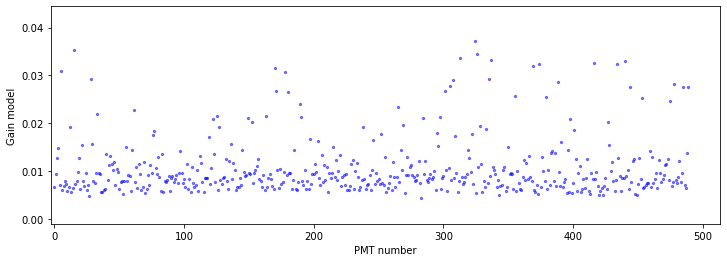

In [113]:
fig = plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(pmt_gain_model_values)),pmt_gain_model_values,
           color = 'blue', marker = '.', s = 20, alpha = 0.5, label = 'CMT')
plt.xlabel("PMT number")
plt.ylabel('Gain model')
plt.ylim(-0.001)
plt.xlim(-3)

Since the corrections will be loaded into a python array changing the values is simple you can just overwrite the array however you want

In [114]:
pmt_gain_model_values = np.repeat(1, len(pmt_gain_model_values))

In [115]:
pmt_gain_model_values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Loading map corrections

We will insert here a map correction to xedocs and make sure it works!

In [116]:
cmt = straxen.CorrectionsManagementServices().interface

In [117]:
s2_maps_mlp = cmt.read('s2_xy_map_mlp')

In [118]:
s2_maps_mlp['v5'][1]

'XENONnT_s2_xy_map_v1_210126_mlp_3_in_1.json'

In [119]:
s2_maps_mlp['v5'].index[1]

Timestamp('2021-01-26 17:47:44+0000', tz='UTC')

In [120]:
xd.list_schemas()

['detector_numbers',
 'fax_configs',
 'electron_drift_velocities',
 'electron_drift_time_gates',
 'electron_lifetimes',
 'rel_extraction_effs',
 'fdc_maps',
 'hit_thresholds',
 'pmt_gains',
 'posrec_models',
 's1_aft_xyz_maps',
 's1_xyz_maps',
 's2_xy_maps',
 'se_gains',
 'electron_diffusion_cte',
 'baseline_samples_nv',
 'relative_light_yield',
 'avg_se_gains',
 'utube_calibrations',
 'diffused_calibrations',
 'ibelt_calibrations',
 'calibration_sources',
 'hotspot_reports',
 'anode_ramps',
 'anode_washes',
 'abnormal_daq_rates',
 'processing_requests']

In [122]:
xd_s2_map = xd_db.corrections.s2_xy_maps.find_docs(time = s2_maps_mlp['v5'].index[1].tz_localize(None))

In [123]:
type(xd_s2_map[1].value)

str

We see that for a given time there are 3 kind of corrections, mlp cnn and gcn. These are all different machine learning algorithms that produce different maps! To get a particular algorithm we can simply add the field: kind = "algorithm". We also note there are 2 time intervals here, the left is for the start time and the right for the end time, keep this in mind when loading up corrections!

In [124]:
xd_s1_map = xd_db.corrections.s1_xyz_maps.find_docs(time = s2_maps_mlp['v5'].index[1].tz_localize(None))

In [126]:
s2_maps_mlp['v5'].index[1].tz_localize(None)

Timestamp('2021-01-26 17:47:44')

In [128]:
xd_s1_map[:2]

[
         Xenon S1XYZMap Document
         -----------------------
  
         Category:      corrections
         Alias:         s1_xyz_maps
         Index:         version=ONLINE, time=2017-01-01 00:00:00 to 2021-05-01 00:00:00, algorithm=cnn
         Values:        created_date=2022-10-24 19:36:12.030000, comments=, reviews=[], value=XnT_S1_xyz_UNITY.json
         ,
 
         Xenon S1XYZMap Document
         -----------------------
  
         Category:      corrections
         Alias:         s1_xyz_maps
         Index:         version=ONLINE, time=2017-01-01 00:00:00 to 2021-05-01 00:00:00, algorithm=gcn
         Values:        created_date=2022-10-24 19:36:12.030000, comments=, reviews=[], value=XnT_S1_xyz_UNITY.json
         ]

In [129]:
xd_s1_map[1].value

'XnT_S1_xyz_UNITY.json'

In [130]:
xd_s1_map[0].value

'XnT_S1_xyz_UNITY.json'

### Creating a new schema

If there is a correction you think we should add you can make your own schema (method)! all you have to do it declare the name for the schema, give it a unique alias and add any other information you want your schema. This is made even easier by just inhereting already existing schemas!

In [132]:
class NewCorrection(xd.schemas.base_corrections.TimeSampledCorrection):
    # this schema will be inheriting all the method TimeSampledCorrections and we can add more of whatever else we want!
    
    _ALIAS = "new_correction"
    value: float
    
    #you can also set any values you want and declare new functions here!

In [133]:
new_simple_schema = NewCorrection(version = "v!", value = 1234, run_id = 34555, 
                                  comments = 'Example of a simple schema inhereting TimeSampledCorrections')

In [159]:
NewCorrection(version = "v!", value = 40, run_id = 34540, 
              comments = 'Example of a simple schema inhereting TimeSampledCorrections').save()

In [160]:
NewCorrection(version = "v!", value = 70, run_id = 34570, 
              comments = 'Example of a simple schema inhereting TimeSampledCorrections').save()

In [145]:
new_simple_schema.save() # when we save you can spesify a database between the brackets, if you dont the default it the staging database

In [138]:
xd.staging_db().register_schema(NewCorrection) # tells xedocs that this new schema was made

In [143]:
xd_db = xd.staging_db()

In [156]:
import rframe

In [164]:
xd_db.corrections.new_correction.find_docs(version = "v!", run_id = 34556)

[
         Xenon NewCorrection Document
         ----------------------------
  
         Category:      corrections
         Alias:         new_correction
         Index:         version=v!, time=2021-12-09 03:21:37.181500
         Values:        created_date=2022-10-24 19:36:12.030000, comments=Example of a simple schema inhereting TimeSampledCorrections, reviews=[], value=1004.8015762287191
         ]

In [161]:
xd_db.corrections.new_correction.find_docs(version = "v!")

[
         Xenon NewCorrection Document
         ----------------------------
  
         Category:      corrections
         Alias:         new_correction
         Index:         version=v!, time=2021-12-09 00:16:33.756000
         Values:        created_date=2022-10-24 19:36:12.030000, comments=Example of a simple schema inhereting TimeSampledCorrections, reviews=[], value=40.0
         ,
 
         Xenon NewCorrection Document
         ----------------------------
  
         Category:      corrections
         Alias:         new_correction
         Index:         version=v!, time=2021-12-09 02:51:09.354000
         Values:        created_date=2022-10-24 19:36:12.030000, comments=Example of a simple schema inhereting TimeSampledCorrections, reviews=[], value=1234.0
         ,
 
         Xenon NewCorrection Document
         ----------------------------
  
         Category:      corrections
         Alias:         new_correction
         Index:         version=v!, time=2021-12-09 05

In [142]:
help(xd.staging_db().register_schema)

Help on method register_schema in module xedocs.contexts:

register_schema(schema, name=None, category=None) method of xedocs.contexts.XedocsContext instance



In [165]:
import pkg_resources

In [175]:
required = {"straxen"}

In [169]:
installed = {pkg.key for pkg in pkg_resources.working_set}

In [177]:
missing = required - installed

In [182]:
len(missing) == 0

True

In [179]:
installed

{'absl-py',
 'aiohttp',
 'aiosignal',
 'alabaster',
 'alembic',
 'appdirs',
 'argcomplete',
 'argon2-cffi',
 'argon2-cffi-bindings',
 'asciitree',
 'astor',
 'asttokens',
 'astunparse',
 'async-timeout',
 'attrs',
 'autoflake',
 'awkward',
 'azure-core',
 'azure-identity',
 'azure-storage-blob',
 'babel',
 'backcall',
 'bandit',
 'bcrypt',
 'beaker',
 'beautifulsoup4',
 'black',
 'bleach',
 'blosc',
 'bokeh',
 'boto',
 'boto3',
 'botocore',
 'bz2file',
 'cachetools',
 'certifi',
 'cffi',
 'chardet',
 'charset-normalizer',
 'click',
 'colorama',
 'commentjson',
 'commonmark',
 'coverage',
 'cutax',
 'cycler',
 'darglint',
 'debugpy',
 'decorator',
 'defusedxml',
 'dill',
 'distlib',
 'doc8',
 'docly',
 'docopt',
 'docutils',
 'dogpile.cache',
 'dpu-utils',
 'entrypoints',
 'epix',
 'eradicate',
 'evaluate',
 'executing',
 'fasteners',
 'fastjsonschema',
 'fcache',
 'filelock',
 'flake8',
 'flake8-2020',
 'flake8-bandit',
 'flake8-broken-line',
 'flake8-bugbear',
 'flake8-builtins',
 'fl